#### Eli Billinger
#### Lydia Smith
#### Cole Wapelhorst
#### CSCI 303 - OL
#### Fall 2020 

<h1> <center> Semester Project : Earthquake Magnitudes

## Description:
#### Overview of Dataset:
For our project, we are going to analyze the “Significant Earthquakes, 1965-2016” dataset from the US Geological Survey (USGS). This dataset contains information gathered from the National Earthquake Information Center (NEIC) detailing attributes, like the date, time, size, location, and depth, of 5.5 magnitude or greater earthquakes that have occurred worldwide from 1965 to 2016.

#### Motivation: 
Our motivation for using this dataset is to learn more about earthquakes and all of the data features that are associated with earthquakes. Also, we want to see if this data about earthquakes can be used to predict features of earthquakes. Another source of motivation to use this dataset comes from all the destruction natural disasters are currently bringing to our world; being able to learn about past natural disasters and better predict for ones to come is something that could be very beneficial. 


#### Questions to Answer:
Our initial plan is to first see if any of the other features in the dataset are related to the magnitude of the earthquake. For example, maybe earthquakes are the most detrimental in the Summer, or maybe earthquakes that occur in the morning are less destructive than ones that occur in the afternoon. From that, we would attempt to predict the magnitude of earthquakes based on features like the time they occurred, their location, etc. 


## Data Acquisition
Describe in some detail the dataset(s) you intend to work with. What data
elements exist, how are they structured, what features you hope to extract, etc. This is also the
place to explain where the data came from, and any limitations on your use/sharing of the data or
your work on the data.

In [1]:
# Set up code - Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.datasets

from pandas import Series, DataFrame

plt.style.use('seaborn-whitegrid')

%matplotlib inline

In [2]:
# Load the dataset into a pandas dataframe
earthquakes = pd.read_table('database.csv', sep = ",")
pd.set_option('display.max_columns', 21) #replace n with the number of columns you want to see completely
# Magnitude Type can be based on any of the following: 
#- ML: Local (Richter) magnitude 
#- MS: surface wave magnitude

earthquakes

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,0.320,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,0.260,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,NaN,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,NaN,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


## Preprocessing
This section includes your findings from initial data cleansing, exploratory
statistics and visualizations, and additional information on reduced features selected through
dimensionality reduction (if appropriate).

In [3]:
# Exploration of the data

# value_counts
print(earthquakes['Depth Seismic Stations'].value_counts(), '\n')
print(earthquakes['Type'].value_counts(), '\n')
print(earthquakes['Magnitude Type'].value_counts())

117.0    29
0.0      29
163.0    26
169.0    26
198.0    25
         ..
776.0     1
629.0     1
689.0     1
793.0     1
647.0     1
Name: Depth Seismic Stations, Length: 736, dtype: int64 

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64 

MW     7722
MWC    5669
MB     3761
MWB    2458
MWW    1983
MS     1702
ML       77
MWR      26
MD        6
MH        5
Name: Magnitude Type, dtype: int64


In [4]:
# describe()
earthquakes.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


Text(0, 0.5, 'Number of Earthquakes')

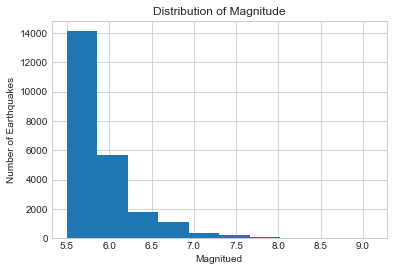

In [5]:
# Exploratory Visualizations

plt.hist(earthquakes['Magnitude'])
plt.title("Distribution of Magnitude")
plt.xlabel("Magnitued")
plt.ylabel("Number of Earthquakes")

Text(0, 0.5, 'Azimuthal Gap')

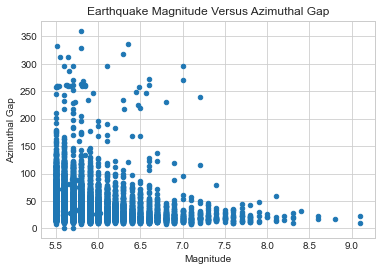

In [6]:
earthquakes.plot(kind = "scatter", x = "Magnitude", y = "Azimuthal Gap")
plt.title("Earthquake Magnitude Versus Azimuthal Gap")
plt.xlabel("Magnitude")
plt.ylabel("Azimuthal Gap")

Text(0, 0.5, 'Longitude')

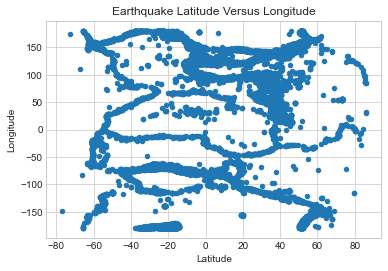

In [7]:
earthquakes.plot(kind = "scatter", x = "Latitude", y = "Longitude")
plt.title("Earthquake Latitude Versus Longitude")
plt.xlabel("Latitude")
plt.ylabel("Longitude")

In [8]:
# Removal of Magnitude Error, Root Mean Square, Horizontal Error, and Horizontal Distance since most earthquakes in
# this dataset do not have values for these feature, therefore these features would not give accurate or reliable results.

earthquakes.drop(columns = ["Magnitude Error", "Root Mean Square", "Horizontal Error", "Horizontal Distance"])

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Seismic Stations,Azimuthal Gap,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,18.0,42.47,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,18.0,48.58,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,NaN,91.00,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,NaN,26.00,US10007NL0,US,US,US,Reviewed


In [9]:
# drops all rows with NaN values  from the given columns
#earthquakes.dropna(subset=['Latitude', 'Longitude', 'Depth', 'Depth Seismic Stations', 'Azimuthal Gap'])
# https://discuss.xgboost.ai/t/valueerror-input-contains-nan-infinity-or-a-value-too-large-for-dtype-float32/1095/3
earthquakes.fillna(earthquakes.mean(), inplace=True)
#earthquakes.fillna(earthquakes.median(), inplace=True)

## Model Selection - Linear Regression
Identify and describe the algorithm(s) used and why; this can be using the
techniques we discuss in class or other machine learning algorithm(s) of your choice.


#### Create Model Object

In [10]:
from sklearn.linear_model import LinearRegression
# creates object lr that is ready to learn and hold the info moving forward
lr = LinearRegression(normalize=True) 

#### Spit Data into Training and Testing Sets

In [11]:
from sklearn.model_selection import train_test_split

feature_namesToTrain = ['Latitude', 'Longitude', 'Depth', 'Depth Seismic Stations']


X_train, X_test, y_train, y_test = train_test_split(
    earthquakes[feature_namesToTrain], earthquakes['Magnitude'])

In [12]:
# check to make sure that data matrices/vectors are the expected size
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17559, 4) (5853, 4) (17559,) (5853,)


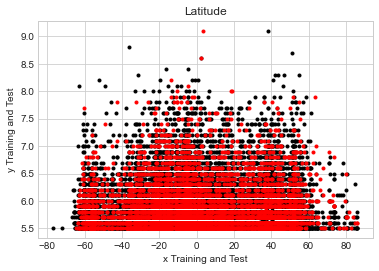

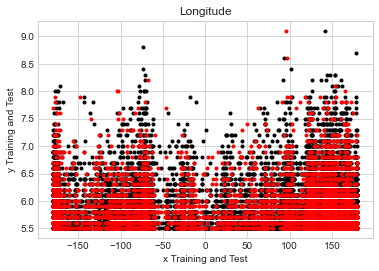

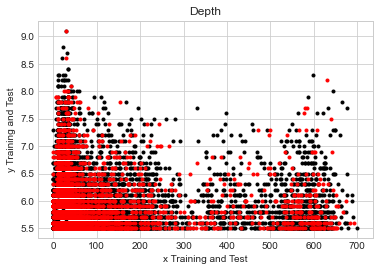

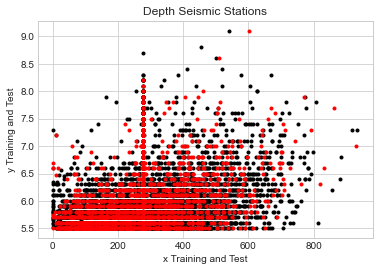

In [13]:
# See the plots of the training and test data for each feature
for f in feature_namesToTrain:
    plt.plot(X_train[f], y_train, 'k.', X_test[f], y_test, 'r.')
    plt.title(f)
    plt.xlabel('x Training and Test')
    plt.ylabel('y Training and Test')
    plt.show()

#### Train lr model using lr.fit()

In [14]:
lr.fit(X_train, y_train)

LinearRegression(normalize=True)

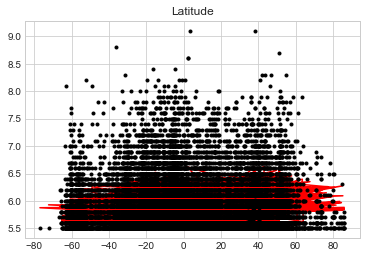

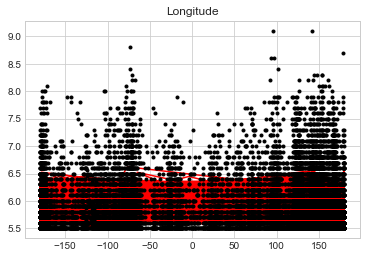

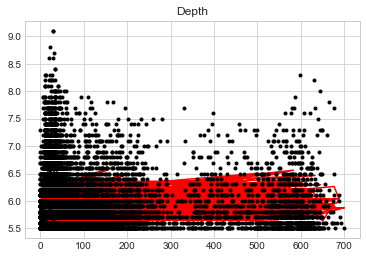

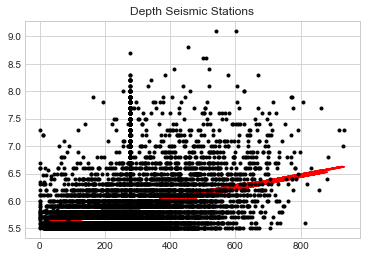

In [15]:
# Attempt to visualize what we got, though this does not appear to be the best method

for f in feature_namesToTrain:
    yhat = lr.predict(earthquakes[feature_namesToTrain])
    plt.plot(earthquakes[f], yhat, 'r-', earthquakes[f], earthquakes['Magnitude'], 'k.')
    plt.title(f)
    
    plt.show()

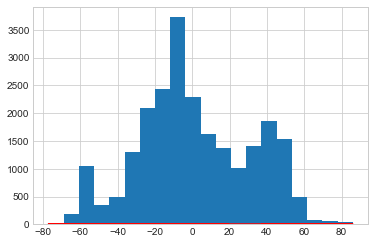

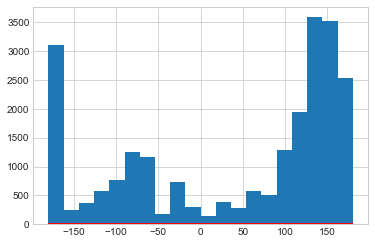

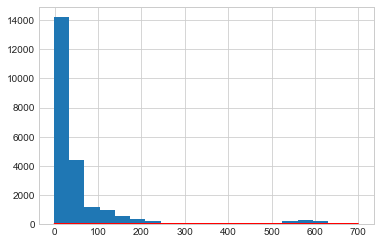

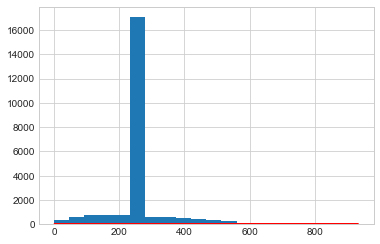

In [16]:
for f in feature_namesToTrain:
    plt.hist(earthquakes[f], bins=20)
    plt.plot(earthquakes[f], yhat, 'r-')
    plt.show()

#### Test Using lr.score()

In [17]:
lr.score(X_test, y_test)

0.07226094325750276

#### Test with Fewer Features

In [18]:
from sklearn.model_selection import train_test_split

feature_namesToTrain = ['Depth', 'Depth Seismic Stations', 'Azimuthal Gap']

X_train, X_test, y_train, y_test = train_test_split(
    earthquakes[feature_namesToTrain], earthquakes['Magnitude'])

In [19]:
# check to make sure that data matrices/vectors are the expected size
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17559, 3) (5853, 3) (17559,) (5853,)


In [20]:
lr.fit(X_train, y_train)

LinearRegression(normalize=True)

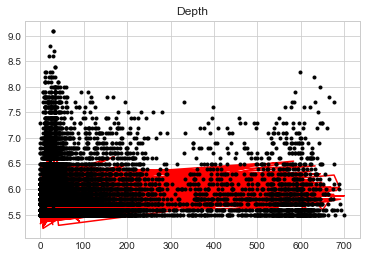

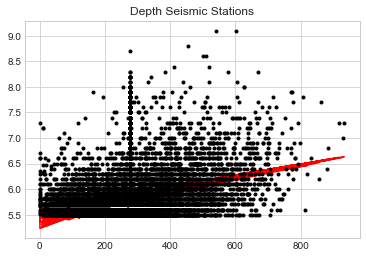

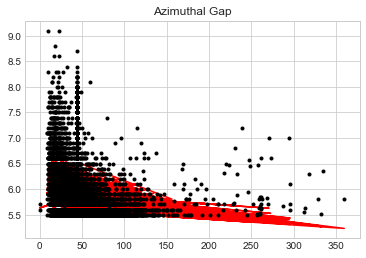

In [21]:
# Attempt to visualize what we got, though this does not appear to be the best method

for f in feature_namesToTrain:
    yhat = lr.predict(earthquakes[feature_namesToTrain])
    plt.plot(earthquakes[f], yhat, 'r-', earthquakes[f], earthquakes['Magnitude'], 'k.')
    plt.title(f)
    
    plt.show()

In [22]:
lr.score(X_test, y_test)

0.05874088253302079

In [27]:
import datetime
import time

timestamp = []
for d, t in zip(earthquakes['Date'], earthquakes['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        # print('ValueError')
        timestamp.append('ValueError')
timeStamp = pd.Series(timestamp)
earthquakes['Timestamp'] = timeStamp.values
final_data = earthquakes.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
earthquakes['Timestamp']

0       -1.57605e+08
1       -1.57441e+08
2        -1.5733e+08
3       -1.57069e+08
4       -1.57001e+08
            ...     
23407    1.48294e+09
23408    1.48294e+09
23409    1.48295e+09
23410    1.48308e+09
23411    1.48315e+09
Name: Timestamp, Length: 23412, dtype: object

In [48]:
from sklearn.ensemble import RandomForestRegressor

X = final_data[['Latitude','Longitude','Timestamp','Depth','Depth Seismic Stations', 'Azimuthal Gap']]
y = final_data[['Magnitude']]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)
model = LinearRegression()
#train our model
model.fit(X_train, y_train.values.ravel())
model.predict(X_test)
model.score(X_test, y_test)


0.0022899625130592405

## Works Cited
 US Geological Survey. Significant Earthquakes, 1965-2016.(Version 1). Web. Accessed 19 September 2020. https://www.kaggle.com/usgs/earthquake-database 